# Métricas que califican una clasificación

## Se carga del conjunto Iris desde la librería scikit-learn

   - Primero se vuelca a un DataFrame, con 4 columnas con sus caracteristicas y una columna con la clasificación objetivo
   - Se muestra la descripción de cada uno de los valores (0, 1, 2) objetivo.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Se divide el conjunto de datos de entrada en Entrenamiento (75%) y Validación (25%). Conjuntos Train y Test

In [2]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,0:4], df.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

### Se hace el ajuste por Naïve-Bayes con la clase disponible en sk-learn

In [3]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

## Matriz de Confusión
Para el caso de un clasificador binario, una matriz de confusion es una matriz cuadrada $2 \times 2$ que proporciona los :
- Verdaderos Positivos (VP): valores positivos correctos
- Verdaderos Negativos (VN): valores negativos correctos
- Falsos Positivos (FP): valores positivos incorrectos
- Falsos Negativos (FN): valores negativos incorrectos

Además consideramos la realidad representada a la izquierda y la predicción en la barra superior:




<img src="./img/Mat_Confusion.png" width="500px">

En nuestro conjunto __Iris__ al disponer de 3 clases distintas, en lugar de una matriz $2 \times 2$ dispondremos una matriz $3 \times 3$, que es posible calcular directamente con la librería sk-learn.

Como se observa hay __un único elemento mal__ en el conjunto de __test__ predicho que aparece como versicolor, cuando debe ser virginica.

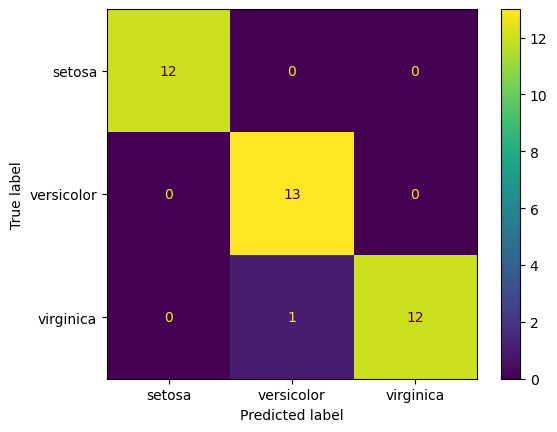

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_pred = clf_NB.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=iris['target_names']).plot()

## Ratios que miden la precisión de la clasificación

El __error__ de predicción (<b>ERR</b>) y la __exactitud__ (<b>ACC</b>, accuracy) mide cuantos ejemplos están mal clasificados (__calidad del modelo__). El error de predicción se calcula:

$$ERR=\frac{FP+FN}{VP+FN+FP+VN}$$

La exactitud es:

$$ACC=\frac{VP+VN}{VP+FN+FP+VN}=1-ERR$$

Otro ratio para medir la calidad es la __Precisión__ (__PRE__, Precision), ratio de verdaderos positivos frente a positivos de la predicción:

$$PRE=\frac{VP}{VP+FP}$$

Un __clasificador perfecto__ tendrá __ERR = 0__, __ACC = 1__ y __PRE = 1__. 

En un conjunto de datos de entrenamiento donde __las clases están equilibradas__ son suficientes los anteriores ratios y también son utiles los ratios:

- __Sensibilidad - SEN, TPR__ _(True Positive Rate o Razón de Verdaderos Positivos)_ : Es la probabilidad de que un positivo sea realmente positivo o capacidad del estimador para dar casos positivos ("_enfermos_"). Es la tasa de verdaderos positivos frente a positivos. Este parámetro también se denomina recall o exhaustividad.
- __Especificidad - SPC, TNR__ _(True Negative Rate o Razón de Verdaderos Negativos)_ : Es la probabilidad de que un negativo sea realmente negativo o capacidad del estimador de dar casos negativos ("_sanos_"). Tasa de verdaderos negativos frente a negativos.

$$SEN=\frac{VP}{P}=\frac{VP}{VP+FN}$$

$$SPC=\frac{VN}{N}=\frac{VN}{VN+FP}$$

Otros ratios interesantes que se pueden formar con la matriz de confusión son:

- __Razón de Falsas Alarmas - FPR__ _(False Posive Rate o Ratio de Falsos Positivos)_ : Es la tasa de falsos positivos entre los positivos reales. Es igual __1 - Especificidad__:

$$FPR =\frac{FP}{N}=\frac{FP}{VN+FP}=1-SPC$$ 

Un __clasificador perfecto__ tendrá __SEN=1__, __SPC=1__ y __FPR=0__.

### F1 - Score
El __Valor-F__, o __F1-score__, combina las medidas de __precision y sensibilidad__ en un sólo valor. Permite comparar el rendimiento combinado de la precisión y la sensibilidad entre varios modelos.:

$$F1=2\frac{PRE \times SEN}{PRE + SEN}$$

El F1-Score es de gran utilidad cuando la distribución de las clases es desigual.

Conforme a los estadísticos de Precisión y Sensibilidad se tienen las siguientes posibilidades:

- Alta precisión y alta sensibilidad: el modelo de Machine Learning escogido maneja perfectamente esa clase.
- Alta precisión y baja sensibilidad: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
- Baja precisión y alta sensibilidad: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.
- Baja precisión y baja sensibilidad: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

Un __clasificador perfecto__ (__SEN=1__ y __ESP=1__) tendrá __F1=1__.

Estos ratios están implementados en la __librería sklearn.metrics__

https://scikit-learn.org/stable/modules/model_evaluation.html

__NOTA A sklearn.metrics__:__ Algunas métricas se definen esencialmente para tareas de clasificación binaria (por ejemplo, f1_score, roc_auc_score). En estos casos, por defecto solo se evalúa la etiqueta positiva, asumiendo por defecto que la clase positiva está etiquetada como 1 (aunque esto puede configurarse a través del __parámetro pos_label__).

### Consejos Generales (*)

- __La precisión__ es un gran estadístico, Pero es útil únicamente cuando se tienen “datasets” simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

- __El indicador F1__ de la matriz de confusión es útil si se  tiene una distribución de clases desigual.

- __Elija mayor precisión__ para conocer qué tan seguro está de los verdaderos positivos, Mientras que la sensibilidad o  “Recall” le servirá para saber si no está perdiendo positivos.

- __Las Falsas Alarmas:__  Por ejemplo,  si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall) , cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas).

Por ejemplo si es preferible que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

- __Elija precisión ( precision en inglés)__  para estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

- __Elija alta Especificidad__:  si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores  y las pruebas de alcoholemia, donde sería intolerable que un falso positivo, libre de alcohol, sea penado.

_(*)_ {cite:p}`Barrios_2019`

### Primeramente obtenemos la predicción del modelo sobre el conjunto de Test

In [5]:
y_pred = clf_NB.predict(X_test)
y_pred

array([2., 0., 0., 0., 1., 0., 1., 1., 0., 1., 2., 2., 2., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 2., 1., 0., 0., 0., 1., 2., 0., 0., 2., 1., 0.,
       0., 1., 2., 2.])

### Y calculamos los indicadores

En el cálculo de la __precisión__ si hay más de 2 clases distintas es obligatorio el parametro __average__ con las opciones:

- '__binary__': Informa únicamente los resultados de la clase especificada por __pos_label__. Esto es aplicable solo si los destinos (y_ {true, pred}) son binarios.
- '__micro__': Calcula métricas a nivel global contando el total de verdaderos positivos, falsos negativos y falsos positivos.
- '__macro__': Calcula métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.
- '__weighted__' ('ponderado'): Calcula métricas para cada etiqueta y encuentre su promedio ponderado por soporte (el número de instancias verdaderas para cada etiqueta). Altera la métrica 'macro' para tener en cuenta el desequilibrio de etiquetas; puede resultar en una puntuación F que no se encuentra entre la precisión y el recuerdo.
- '__samples__' ('muestras'): Calcula métricas para cada instancia y encuentre su promedio (solo es significativo para la clasificación de múltiples etiquetas donde esto difiere de la puntuación de precisión).

De forma análoga se encuentra el parámetro __average__ en las funciones __recall_score__ y __f1_score__ usadas para el cálculo de los otros 2 indicadores

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Exactitud - Accuracy: 0.974
Precision: 0.974
Sensibilidad - Recall: 0.974
F1: 0.974


__El ratio que se utilizará a partir de ahora es la exactitud o accuracy__

In [7]:
from sklearn.metrics import accuracy_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.974



## Control del error de Clasicación

__Cuando clasificamos nuevas instancias__:

- Interesa reducir la __tasa de error esperada__.
- Realizar promedios reduce la varianza: $Var(\bar{X}) = \frac{1}{N} Var(X)$
- Problema: sólo tenemos __un conjunto de entrenamiento__.
- Una de las técnicas habituales es la llamada __bootstrapping__: se estima el error generando $N$ muestras equiprobables con reemplazamiento del conjunto de entrenamiento $D_N$.
- Como las muestras con reemplazamiento tienen el mismo tamaño que $D_N$, se espera una fracción $1 - \frac{1}{e}$ de registros en el conjunto de entrenamiento: es la llamada __regla $0.632$__ para el estimador bootstrap.

### Explicación

Dada una muestra $x_1,\ldots,x_n$ original, el método bootstrap consiste en tomar nuevas muestras a partir de ella __con reemplazamiento__. 

Al generar una nueva muestra, tomamos elementos de la muestra original uno a uno. La probabilidad de escoger, por ejemplo, el elemento $x_1$ es $1/n$, por tanto la probabilidad de no tomarlo es $1-1/n$. Como las nuevas muestras tienen $n$ elementos, tomados de manera independiente, con reemplazamiento, la probabilidad que $x_1$ no esté en la nueva muestra es $(1-1/n)^n$.

Al hacer $n\to\infty$ tenemos $1/e$ que es la probabilidad de que un elemento no haya sido escogido.

Por lo tanto, la probabilidad que un elemento esté en las muestras tomadas con bootstrapping es $1-1/e\approx0.632$.

Esto quiere decir que cada una de las muestras que se crean usando el método bootstraping, tiene, en media, un 63% del conjunto original.


## Una mejora de la precisión 

__Bagging ("bootstrap aggregating")__:

- Realizamos N réplicas del conjunto de entrenamiento mediante __bootstrapping__.
- En media, cada conjunto de entrenamiento tendrá un 63% de las instancias del conjunto inicial.
- Utilizamos cada una de las réplicas para clasificar el conjunto de validación.
- Usamos la regla del __voto mayoritario__ para asignar las clases.
- Este método ayuda a corregir resultados de clasificadores "inestables".

<img src="./img/Bagging.png" width="500px">


### Estimación del error por Bootstraping

In [8]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Boot = GaussianNB()
scores=[]

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Boot = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Boot = y_train[indicesNew] # y sus categorías
    clf_Boot.fit(X_train_Boot, y_train_Boot)
    scores.append(clf_Boot.score(X_test, y_test))
print('\nExactitud: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Exactitud: 0.962 +/- 0.019


### Implementación del Bagging

In [9]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Bagg = [GaussianNB() for i in range(NumRepeticiones)]

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos índices cogidos al azar
    X_train_Bagg = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Bagg = y_train[indicesNew] # y sus categorías
    clf_Bagg[rep].fit(X_train_Bagg, y_train_Bagg)    

__Ahora se hace uso de N clasificadores entrenados para predecir con voto mayoritario el conjunto de test__ 

__Se usa la moda como forma de obtener la etiqueta más votada__

In [12]:
### ATENCIÓN: HAY QUE USAR EL VOTO MAYORITARIO, POR TANTO HAY QUE GUARDAR TODOS LOS VOTOS
from scipy import stats
from sklearn.metrics import accuracy_score
y_predMult = [clf_Bagg[rep].predict(X_test) for rep in range(NumRepeticiones)]
y_predVoto = stats.mode((y_predMult)[0][0])
print('Exactitud - Accuracy: %.4f' % accuracy_score(y_true=y_test, y_pred=y_predVoto))

ValueError: Found input variables with inconsistent numbers of samples: [38, 2]

### Implementación del Bagging (librería sk-learn)

En la librería sk-learn se encuentra una implementación del Bagging para clasificadores en la sublibrería __BaggingClassifier__:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Los __parámetros__ más importantes del constructor son:

- __base_estimator__ : el estimador base que utiliza. Por defecto es __DecisionTreeClassifier__.
- __n_estimators__ : número de estimadores, __por defecto son 10__.

Los __métodos__ que se pueden invocar desde el objeto creado con el constructor son, entre otros:

- __fit(X,y)__ : realiza el ajuste del modelo a partir de una conjunto __X__ de características y un conjuno __y__ de respuestas.
- __predict(X)__ : predice las resupuestas de un conjunto de características __X__.
- __score(X,y)__ : devuelve la exactitud o accuracy conocidos un conjunto de características __X__ y sus respuestas correctas __y__.


In [13]:
from sklearn.ensemble import BaggingClassifier
bggC = BaggingClassifier()
bggC.fit(X_train, y_train)
print('Exactitud - Accuracy: %.4f' % bggC.score(X_test, y_test))

Exactitud - Accuracy: 0.9737


__Se repite el Bagging cambiando el clasificador__

Se usa el clasificador K-Vecinos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bggC = BaggingClassifier(base_estimator=KNeighborsClassifier())
bggC.fit(X_train, y_train)
print('Exactitud - Accuracy: %.4f' % bggC.score(X_test, y_test))

Exactitud - Accuracy: 0.9737


<span style='color:Red'> <font size="5"> <b>Información Complementaria</b></font> </span>

## ¿Es bueno el clasificador? P-Valor


Un clasificador implica:

- Un conjunto de datos D
- Un clasificador entrenado, F, sobre D.
- Una medida de la exactitud del clasificador, accuracy (ACC).

Se tiene un único dato (ACC) y con eso no se puede hacer nada. Es como si mide la altura de una persona, no dice nada acerca de la media de una población

Entonces, __¿cómo contestar la pregunta anterior acerca de si un solo clasificador es bueno?__

Usando un test de permutación se mide la probabilidad de que el ACC alcanzado haya sido por pura casualidad. El p-valor representará la fracción de datos aleatorios en los que el clasificador se comporta igual o mejor que en los datos reales que tenemos.

En el fondo se está analizando si hay correlación entre X e Y. El clasificador se encarga de encontrar esta estructura/conexión, pero si ésta no existe, el clasificador no está cumpliendo su función, y no debe ser considerado un buen clasificador.

__La hipótesis nula es que el clasificador que tenemos ha actuado por pura suerte__, es decir, no es bueno. Y el método consiste en:
- Generar, a partir de los datos, nuevos conjuntos de datos “aleatorios”, realizando permutaciones de los que tenemos. Generamos conjuntos D’ a partir de D. El número de nuevos conjuntos es M.
- Para cada nuevo conjunto de datos, D’, usamos el clasificador F, y hallamos una precisión ACC’
- Contamos el número de veces que ACC’ es mejor que la ACC original que teníamos con los datos originales, lo llamamos “Cont”

La formula para calcular el p-valor es

$$p\_valor = \frac{Cont+1}{M+1}$$

El p-valor representa la fracción de las muestra aleatorias en que el clasificador se comportó mejor que en los datos originales. __Por tanto, si el p-valor es pequeño, podemos decir que la ACC es significativa (significativamente alta) y el clasificador es significativo sobre la hipótesis nula, es decir, rechazamos la hipótesis nula.__

Respecto a las versiones “randomizadas” de los datos, D’ (las permutaciones), es importante subrayar que, idealmente, __deberían tomarse__ todas las posibles permutaciones de los datos, pero esto es costosísimo computacionalmente.



In [79]:
## Entrenamiento inicial y toma del ACC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred=clf_NB.predict(X_test)
ACC_Ini = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Exactitud - Accuracy Inicial: %.3f' % ACC_Ini)

Exactitud - Accuracy Inicial: 0.974


__Se mide la Exactitud en M permutaciones__

In [84]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Boot = GaussianNB()
Cont = 0

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Boot = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Boot = y_train[indicesNew] # y sus categorías
    clf_Boot.fit(X_train_Boot, y_train_Boot)
    if clf_Boot.score(X_test, y_test) > ACC_Ini:
        Cont +=1

p_valor = (Cont+1)/(NumRepeticiones + 1)
p_valor, Cont

(0.009900990099009901, 0)

__Luego podemos concluir que el clasificador GaussianNB para el conjunto Iris es bueno__
